In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

In [2]:
%aimport keypoints
%aimport plots
%aimport data
%aimport pipeline
%aimport submit
%aimport features

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(X, Y, header) = data.df_train()

In [48]:
X.sample(1)

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
1709,19.0,17.0,17.0,23.0,15.0,13.0,20.0,16.0,21.0,22.0,...,125.0,127.0,125.0,123.0,107.0,104.0,87.0,77.0,63.0,56.0


In [311]:
IDX=1
# Load 2d
images = np.vstack(X.values)
images2d = images.reshape(-1, 1, 96, 96)

In [312]:
# Flip
images2d_flipped = images2d[:, :, :, ::-1]

IndexError: list index out of range

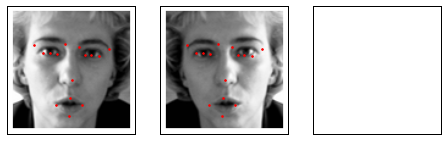

In [313]:
xx = [
images2d[IDX].flatten(),
images2d_flipped[IDX].flatten()
]

yy = [Y.values[IDX], Y.values[IDX]]
plots.show_imgs2(xx, yy)



In [324]:
mapping = [2, 3, 0, 1, 8, 9, 10, 11, 4, 5, 6,
           7, 16, 17, 18, 19, 12, 13, 14, 15, None,
           None, 24, 25, 22, 23, None, None, None, None]

# Let's see if we got it right:
flipped= Y.copy()
for i in range(len(mapping)):
    mapped=mapping[i]
    if mapped is not None:
        if Y.columns[i].endswith("_x"):
            flipped.values[:, mapped] = 96 - Y.values[:, i]
            print("# {} -> {}".format(Y.columns[i], Y.columns[mapped]))
            #print("{} -> {}, {} -> {}".format(
            #                        Y.columns[i], 
            #                          Y.columns[mapped],
            #                          Y.values[i][1], 
            #                          flipped.values[mapped][1]))
        else:
            flipped.values[:, mapped] = Y.values[:, i]
            print("# {} -> {}".format(Y.columns[i], Y.columns[mapped]))
    


# left_eye_center_x -> right_eye_center_x
# left_eye_center_y -> right_eye_center_y
# right_eye_center_x -> left_eye_center_x
# right_eye_center_y -> left_eye_center_y
# left_eye_inner_corner_x -> right_eye_inner_corner_x
# left_eye_inner_corner_y -> right_eye_inner_corner_y
# left_eye_outer_corner_x -> right_eye_outer_corner_x
# left_eye_outer_corner_y -> right_eye_outer_corner_y
# right_eye_inner_corner_x -> left_eye_inner_corner_x
# right_eye_inner_corner_y -> left_eye_inner_corner_y
# right_eye_outer_corner_x -> left_eye_outer_corner_x
# right_eye_outer_corner_y -> left_eye_outer_corner_y
# left_eyebrow_inner_end_x -> right_eyebrow_inner_end_x
# left_eyebrow_inner_end_y -> right_eyebrow_inner_end_y
# left_eyebrow_outer_end_x -> right_eyebrow_outer_end_x
# left_eyebrow_outer_end_y -> right_eyebrow_outer_end_y
# right_eyebrow_inner_end_x -> left_eyebrow_inner_end_x
# right_eyebrow_inner_end_y -> left_eyebrow_inner_end_y
# right_eyebrow_outer_end_x -> left_eyebrow_outer_end_x
# right_

Index([u'left_eye_center_x', u'left_eye_center_y', u'right_eye_center_x',
       u'right_eye_center_y', u'left_eye_inner_corner_x',
       u'left_eye_inner_corner_y', u'left_eye_outer_corner_x',
       u'left_eye_outer_corner_y', u'right_eye_inner_corner_x',
       u'right_eye_inner_corner_y', u'right_eye_outer_corner_x',
       u'right_eye_outer_corner_y', u'left_eyebrow_inner_end_x',
       u'left_eyebrow_inner_end_y', u'left_eyebrow_outer_end_x',
       u'left_eyebrow_outer_end_y', u'right_eyebrow_inner_end_x',
       u'right_eyebrow_inner_end_y', u'right_eyebrow_outer_end_x',
       u'right_eyebrow_outer_end_y', u'nose_tip_x', u'nose_tip_y',
       u'mouth_left_corner_x', u'mouth_left_corner_y', u'mouth_right_corner_x',
       u'mouth_right_corner_y', u'mouth_center_top_lip_x',
       u'mouth_center_top_lip_y', u'mouth_center_bottom_lip_x',
       u'mouth_center_bottom_lip_y'],
      dtype='object')


IndexError: list index out of range

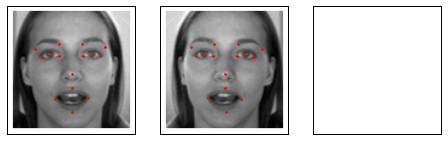

In [323]:
IDX=30
xx = [
images2d[IDX].flatten(),
images2d_flipped[IDX].flatten(),
]

yy = [Y.values[IDX], flipped.values[IDX]]
#X_flipped= np.ravel(images2d_flipped).reshape(2140, 9216)
print(flipped.columns)
plots.show_imgs2(xx, yy)
